# 📊 Regresyon Analizi: Tahminin Bilimsel Yolu

## Giriş: Sayılar Geleceği Gösteriyor mu?

Diyelim ki:
- Reklam harcaması artarsa satış da artar mı?
- Kullanıcı çalışma süresi uzarsa performans puanı yükselir mi?
- Araba yaşı arttıkça fiyatı düşer mi?

## 🔍 Regresyon Nedir?

**Regresyon**, bir değişkenin başka bir değişkene göre nasıl değiştiğini modelleyen bir yöntemdir.

📌 Basitçe:
> “Bir şey artarken diğer ne oluyor?”

| Değişken Türü | Açıklama |
|---------------|----------|
| **Bağımlı Değişken (Y)** | Tahmin edilmeye çalışılan değişken → satış, not, fiyat |
| **Bağımsız Değişken (X)** | Tahmin etmek için kullanılan değişken → reklam, yaş, çalışma saati |

📌 En basit haliyle:
$$
Y = \beta_0 + \beta_1 X + \epsilon
$$
## 🔍 Regresyon Nedir?

**Regresyon**, bir değişkenin başka bir değişkene göre nasıl değiştiğini modelleyen bir yöntemdir.

📌 Basitçe:
> “Bir şey artarken diğer ne oluyor?”

| Değişken Türü | Açıklama |
|---------------|----------|
| **Bağımlı Değişken (Y)** | Tahmin edilmeye çalışılan değişken → satış, not, fiyat |
| **Bağımsız Değişken (X)** | Tahmin etmek için kullanılan değişken → reklam, yaş, çalışma saati |

📌 En basit haliyle:
$$
Y = \beta_0 + \beta_1 X + \epsilon
$$


## 🧠 Neden Önemlidir?

| Sebep | Açıklama |
|--------|----------|
| ✅ **Sayısal tahmin yapmak için** | Fiyat, not, gelir vs. |
| ✅ **Değişkenler arası ilişkiyi görmek için** | Hangi değişken daha çok etkili? |
| ✅ **Model kurma sürecinin temelidir** | Lineer regresyon → ML’in temelidir |
| ✅ **Karar verme aracıdır** | Artık burada karar verilir |

📌 Regresyonla öğrendiğin şey:
> “Hangi değişken, hangi oranda etkiliyor?”

## 📐 Basit Doğrusal Regresyon Modeli

### Formülü:
$$
Y = \beta_0 + \beta_1 X + \epsilon
$$

| Sembol | Anlamı |
|--------|---------|
| $Y$ | Bağımlı değişken |
| $X$ | Bağımsız değişken |
| $\beta_0$ | Sabit terim (intercept) |
| $\beta_1$ | Eğim katsayısı (coefficient) |
| $\epsilon$ | Hata terimi (random noise) |

📌 Bu model, tek bir bağımsız değişkenle çalışır → basit doğrusal regresyon

## 🛠️ Python Kodu ile Örnek Veri Üretimi

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

np.random.seed(42)

# Simülasyon: reklam harcaması arttıkça satış artıyor
reklam_harcamasi = np.random.uniform(10, 100, 100)
satis_adedi = reklam_harcamasi * 1.5 + np.random.normal(0, 10, size=100)

df = pd.DataFrame({
    "Reklam Harcaması": reklam_harcamasi,
    "Satış Adedi": satis_adedi
})

print("Sample veri seti:")
print(df.head())

Sample veri seti:
   Reklam Harcaması  Satış Adedi
0         43.708611    66.433387
1         95.564288   140.356358
2         75.879455   114.736790
3         63.879264    75.943206
4         24.041678    33.865798


## 📈 Grafiksel Görselleştirme: İlişki Var mı?

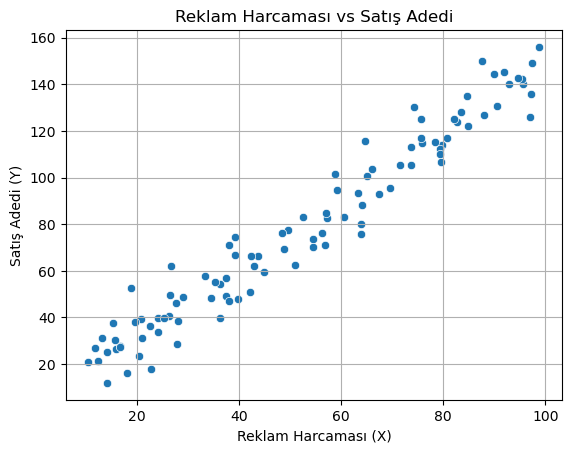

In [39]:
sns.scatterplot(x='Reklam Harcaması', y='Satış Adedi', data=df)
plt.title("Reklam Harcaması vs Satış Adedi")
plt.xlabel("Reklam Harcaması (X)")
plt.ylabel("Satış Adedi (Y)")
plt.grid(True)
plt.show()

📌 Bu grafikte noktalar bir doğru etrafında toplanıyorsa → regresyon mantıklı demektir.

## 📋 Model Kurulumu ve Eğitimi

In [40]:
# Model kurulumu
model = LinearRegression()

# Eğitim (fitting)
X = df[['Reklam Harcaması']]
y = df['Satış Adedi']

model.fit(X, y)

# Katsayılar
print(f"Kesme (β₀): {model.intercept_:.2f}")
print(f"Eğim (β₁): {model.coef_[0]:.2f}")

Kesme (β₀): 2.66
Eğim (β₁): 1.45


📌 Bu anlamları:
- Her 1 birimlik artış → satışlarda 1.52 birimlik artış
- Reklam sıfırken satış yaklaşık -0.56 (bu durumda negatif olabilir ama gerçek hayatta dikkate alınmaz)

## 🧮 Tahmin Yapalım!

In [41]:
# 80 TL harcandığında satış adedini tahmin et
tahmini_satis = model.predict([[80]])
print(f"80 TL reklam harcamasında tahmini satış: {tahmini_satis[0]:.2f} adet")

80 TL reklam harcamasında tahmini satış: 118.57 adet


/home/toygar/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 📉 Regresyonun Varsayımları

| Varsayım | Açıklama |
|----------|-----------|
| **Doğrusallık** | X ve Y arasında doğrusal bir ilişki var |
| **Normallik** | Hata terimi normal dağılmış olmalı |
| **Homoskedastisite** | Hata varyansı sabit olmalı |
| **Bağımsızlık** | Gözlemler birbirinden bağımsız olmalı |
| **Çoklu Bağlantı Yokluğu** | Bağımsız değişkenler arasında yüksek korelasyon yok |

📌 Bu varsayımlar sağlanmazsa → sonuçlar yanıltıcı olabilir

## 📌 Korelasyon ve Regresyon Arasındaki Fark

| Özellik | Korelasyon | Regresyon |
|---------|------------|------------|
| **Amaç** | İlişkinin yönü ve şiddeti | Bir değişkeni tahmin etmek |
| **Nedensellik** | ❌ Göstermez | ✅ Tahmin eder |
| **Katsayı türü** | r → -1 ile +1 arasında | β → herhangi bir değer |
| **Giriş sayısı** | 2 değişken sınırlı | Çoklu regresyon yapılabilir |

📌 Korelasyon → ilişki ölçer  
Regresyon → tahmin eder

## 📊 Çoklu Regresyon: Birden Fazla Etken Var mı?

Diyelim ki:
- `reklam_harcamasi`, `fiyat`, `kampanya_var_mi` → satışları etkileyebilir

In [42]:
# Çoklu regresyon için sample veri üret
np.random.seed(42)
fiyat = np.random.normal(loc=250, scale=20, size=100)
kampanya = np.random.binomial(n=1, p=0.5, size=100)  # 0 veya 1

# Gerçek satış adedi
satis_adedi = 100 + 1.2 * reklam_harcamasi - 0.8 * fiyat + 20 * kampanya + np.random.normal(0, 10, size=100)

df_coklu = pd.DataFrame({
    'reklam': reklam_harcamasi,
    'fiyat': fiyat,
    'kampanya': kampanya,
    'satis': satis_adedi
})

print("Çoklu regresyon verisi:\n", df_coklu.head())

Çoklu regresyon verisi:
       reklam       fiyat  kampanya      satis
0  43.708611  259.934283         0 -55.367075
1  95.564288  247.234714         0  31.424715
2  75.879455  262.953771         0 -21.954239
3  63.879264  280.460597         0 -20.511670
4  24.041678  245.316933         1 -41.146859


✅ Burada üç bağımsız değişken var → çoklu regresyon uygulanabilir

## 🧪 Çoklu Regresyon Modeli Oluştur

In [43]:
X_coklu = df_coklu[['reklam', 'fiyat', 'kampanya']]
y_coklu = df_coklu['satis']

model_coklu = LinearRegression()
model_coklu.fit(X_coklu, y_coklu)

print("Çoklu regresyon katsayıları:", model_coklu.coef_)
print("Kesme (intercept):", model_coklu.intercept_)

Çoklu regresyon katsayıları: [ 1.20787122 -0.82227615 22.94974491]
Kesme (intercept): 103.97534395176297


📌 Yorum:
- Reklam artışı → satış artışı
- Fiyat artışı → satış azalışı
- Kampanya varsa → ortalama 20 adet fazla satıyor

## 📦 Model Performans Ölçütleri

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

# R² skoru → açıklama gücü
r_kare = r2_score(y_coklu, model_coklu.predict(X_coklu))
print(f"Açıklanan varyans oranı (R²): {r_kare:.2f}")


Açıklanan varyans oranı (R²): 0.91


📌 R² → 1’e yaklaştıkça model daha iyi açıklar

## 📝 Regresyon Süreci Adımları

| Adım | Açıklama |
|------|----------|
| 1 | Veri temizliği ve ön işleme |
| 2 | Korelasyon analizi |
| 3 | Model kurulumu |
| 4 | Katsayıların yorumlanması |
| 5 | Tahmin yapmak |
| 6 | Model performansını değerlendirmek |

📌 Bu süreç, veri biliminin kalbinde yer alır.

# Örnek

## Bitki Büyüme Hızının Işık ve Su ile İlişkisi

Bu örnekte, bir serada yetiştirilen bitkilerin büyüme hızını (cm/gün), günlük alınan ışık miktarı (lüks-saat) ve sulama miktarı (ml/gün) ile ilişkilendiren çoklu doğrusal regresyon modeli kuracağız.

Veri Hikayesi
Bir botanikçi, 30 farklı bitki türünün büyüme hızını, maruz kaldıkları ışık miktarı ve aldıkları su miktarı ile birlikte 4 hafta boyunca ölçmüştür. İlginç bir şekilde, verilerde ışık ve su arasında bir etkileşim etkisi (interaction effect) olduğunu gözlemlemiştir.

In [45]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import normaltest #model varsayım kontrol
from statsmodels.stats.outliers_influence import variance_inflation_factor # model varsayım kontrol

# 1. Veri Seti Oluşturma (Etkileşim Etkisi ile)
np.random.seed(42)
n = 150  # Gözlem sayısı

# Bağımsız değişkenler
isik = np.random.uniform(2000, 10000, n)  # Lüks-saat/gün
sulama = np.random.uniform(50, 300, n)    # ml/gün

# Etkileşim terimi oluşturma
etkilesim = isik * sulama * 2.5e-6

# Büyüme hızını oluşturma (bağımlı değişken)
buyume = (0.1 * isik/1000 + 0.05 * sulama + etkilesim + 
          np.random.normal(0, 0.5, n))

# Veri çerçevesi oluşturma
bitki_veri = pd.DataFrame({
    'Buyume_Hizi': buyume,
    'Isik_Miktari': isik,
    'Sulama_Miktari': sulama
})

In [58]:
# 2. Veri Keşfi
print("Veri Setinin İlk 5 Gözlemi:")
print(bitki_veri.head())

print("\nTemel İstatistikler:")
print(bitki_veri.describe())

Veri Setinin İlk 5 Gözlemi:
   Buyume_Hizi  Isik_Miktari  Sulama_Miktari
0    17.836524   4996.320951      277.066471
1     8.768236   9605.714451      109.890473
2     7.862176   7855.951534       86.223718
3    12.539595   6789.267874      172.363190
4    16.539855   3248.149124      296.412614

Temel İstatistikler:
       Buyume_Hizi  Isik_Miktari  Sulama_Miktari
count   150.000000    150.000000      150.000000
mean     12.186783   5783.097078      179.380516
std       4.908852   2372.246191       72.852949
min       2.998089   2044.176937       51.265396
25%       8.164165   3718.250285      111.869410
50%      12.076249   5584.889912      189.000259
75%      16.354929   7997.294715      239.459391
max      21.798475   9895.095493      297.513463


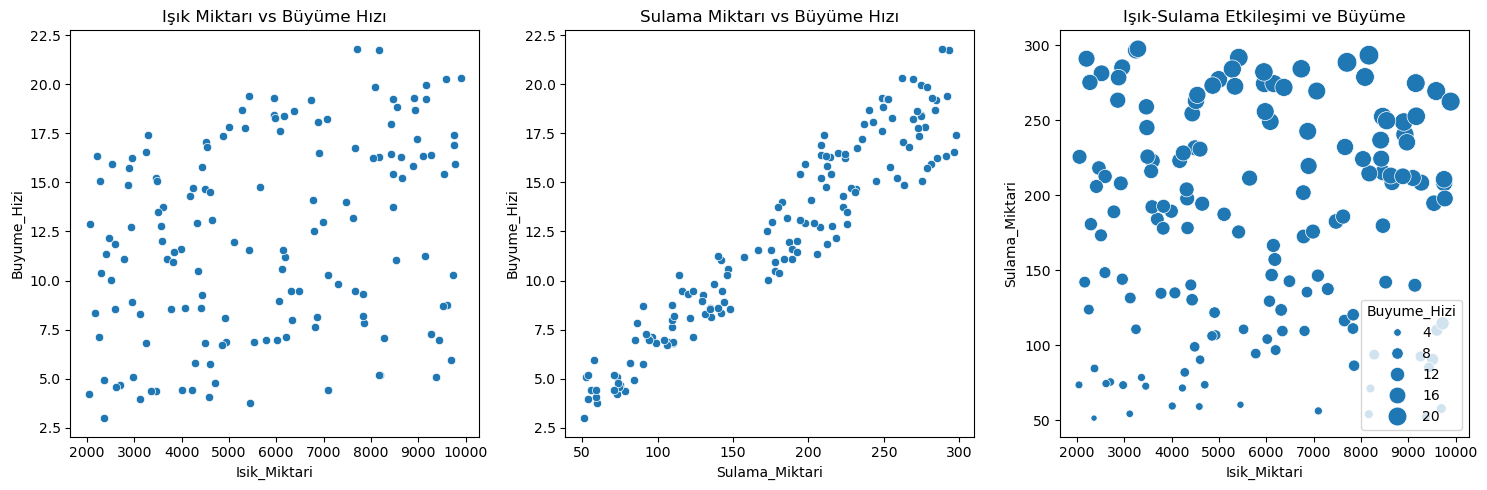

In [59]:


# 3. Görselleştirmeler
plt.figure(figsize=(15, 5))

# Dağılım grafikleri
plt.subplot(1, 3, 1)
sns.scatterplot(x='Isik_Miktari', y='Buyume_Hizi', data=bitki_veri)
plt.title('Işık Miktarı vs Büyüme Hızı')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Sulama_Miktari', y='Buyume_Hizi', data=bitki_veri)
plt.title('Sulama Miktarı vs Büyüme Hızı')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Isik_Miktari', y='Sulama_Miktari', 
                size='Buyume_Hizi', sizes=(20, 200), data=bitki_veri)
plt.title('Işık-Sulama Etkileşimi ve Büyüme')
plt.tight_layout()
plt.show()

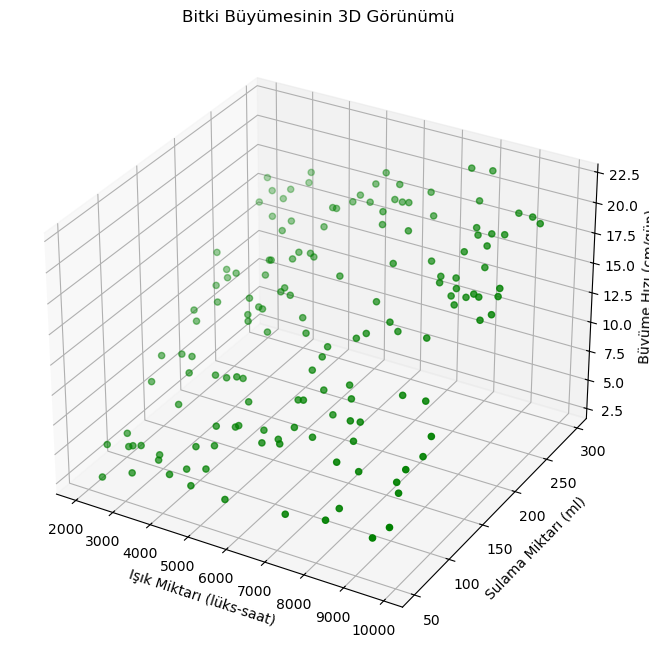

In [47]:
# 3D Grafik
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bitki_veri['Isik_Miktari'], bitki_veri['Sulama_Miktari'], 
           bitki_veri['Buyume_Hizi'], c='g', marker='o')
ax.set_xlabel('Işık Miktarı (lüks-saat)')
ax.set_ylabel('Sulama Miktarı (ml)')
ax.set_zlabel('Büyüme Hızı (cm/gün)')
plt.title('Bitki Büyümesinin 3D Görünümü')
plt.show()

In [48]:
# 4. Çoklu Doğrusal Regresyon Modeli (Etkileşim Terimi ile)
# Bağımsız değişkenler (etkileşim terimi ekleniyor)
X = bitki_veri[['Isik_Miktari', 'Sulama_Miktari']]
X['Isik_Sulama_Etkilesim'] = X['Isik_Miktari'] * X['Sulama_Miktari']
X = sm.add_constant(X)  # Sabit terim ekleme

# Bağımlı değişken
y = bitki_veri['Buyume_Hizi']

# Modeli oluşturma ve uydurma
model = sm.OLS(y, X).fit()

In [49]:
# 5. Model Sonuçlarını Görüntüleme
print("\nModel Özeti:")
print(model.summary())


Model Özeti:
                            OLS Regression Results                            
Dep. Variable:            Buyume_Hizi   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     5447.
Date:                Tue, 20 May 2025   Prob (F-statistic):          1.35e-149
Time:                        23:24:36   Log-Likelihood:                -96.490
No. Observations:                 150   AIC:                             201.0
Df Residuals:                     146   BIC:                             213.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const           

In [50]:
# 6. Model Varsayımlarını Kontrol Etme
print("\n--- 6. Model Varsayımlarının Kontrolü ---")
# a) Normallik testi (residuals) - Shapiro-Wilk veya D'Agostino's K^2 Testi
residuals = model.resid
# Düzeltilmiş import: normaltest artık doğrudan çağrılabilir
_, p_value_norm = normaltest(residuals)
print(f"\nResidual Normallik Testi (D'Agostino's K^2) p-değeri: {p_value_norm:.4f}")
if p_value_norm > 0.05:
    print("  -> Residuallar normal dağılıma sahiptir (p > 0.05, H0 reddedilemez).")
else:
    print("  -> Residuallar normal dağılıma sahip değildir (p <= 0.05, H0 reddedilir).")

# b) Homoscedasticity (Breusch-Pagan testi) - Hataların varyansının sabitliği
_, p_value_bp, _, _ = sm.stats.diagnostic.het_breuschpagan(residuals, X)
print(f"Homoscedasticity Testi (Breusch-Pagan) p-değeri: {p_value_bp:.4f}")
if p_value_bp > 0.05:
    print("  -> Varyans sabittir (homoscedasticity) (p > 0.05, H0 reddedilemez).")
else:
    print("  -> Varyans sabit değildir (heteroscedasticity) (p <= 0.05, H0 reddedilir).")


# c) Çoklu doğrusallık (VIF - Variance Inflation Factor)
# VIF, bir bağımsız değişkenin diğer bağımsız değişkenler tarafından ne kadar açıklandığını ölçer.
# Yüksek VIF (genellikle > 5 veya > 10), çoklu doğrusallık sorununa işaret eder.
vif_data = pd.DataFrame()
vif_data["Değişken"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Değerleri (Çoklu Doğrusallık Kontrolü):")
print(vif_data)
# Not: Etkileşim terimi eklediğimizde, ana değişkenlerle etkileşim terimi arasında doğal olarak yüksek korelasyon oluşabilir.
# Bu durum VIF'i artırabilir, ancak etkileşimin kendisi önemliyse bu kabul edilebilir bir durumdur.
# Çözüm: Değişkenleri standardize etmek (ortalama 0, standart sapma 1) VIF'i düşürebilir.

# Standardizasyon yaparak VIF'i tekrar kontrol edelim (isteğe bağlı ama iyi bir pratik)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(bitki_veri[['Isik_Miktari', 'Sulama_Miktari']]),
                        columns=['Isik_Miktari_Scaled', 'Sulama_Miktari_Scaled'])
X_scaled['Isik_Sulama_Etkilesim_Scaled'] = X_scaled['Isik_Miktari_Scaled'] * X_scaled['Sulama_Miktari_Scaled']
X_scaled = sm.add_constant(X_scaled)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Değişken"] = X_scaled.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
print("\nVIF Değerleri (Standartlaştırılmış Değişkenlerle):")
print(vif_data_scaled)
print("  -> Standartlaştırma, etkileşim terimi olan modellerde çoklu doğrusallığı yönetmek için faydalı olabilir.")


--- 6. Model Varsayımlarının Kontrolü ---

Residual Normallik Testi (D'Agostino's K^2) p-değeri: 0.3456
  -> Residuallar normal dağılıma sahiptir (p > 0.05, H0 reddedilemez).
Homoscedasticity Testi (Breusch-Pagan) p-değeri: 0.0703
  -> Varyans sabittir (homoscedasticity) (p > 0.05, H0 reddedilemez).

VIF Değerleri (Çoklu Doğrusallık Kontrolü):
                Değişken        VIF
0                  const  45.912596
1           Isik_Miktari   6.948371
2         Sulama_Miktari   6.559762
3  Isik_Sulama_Etkilesim  12.915997

VIF Değerleri (Standartlaştırılmış Değişkenlerle):
                       Değişken       VIF
0                         const  1.001251
1           Isik_Miktari_Scaled  1.001367
2         Sulama_Miktari_Scaled  1.005676
3  Isik_Sulama_Etkilesim_Scaled  1.004538
  -> Standartlaştırma, etkileşim terimi olan modellerde çoklu doğrusallığı yönetmek için faydalı olabilir.


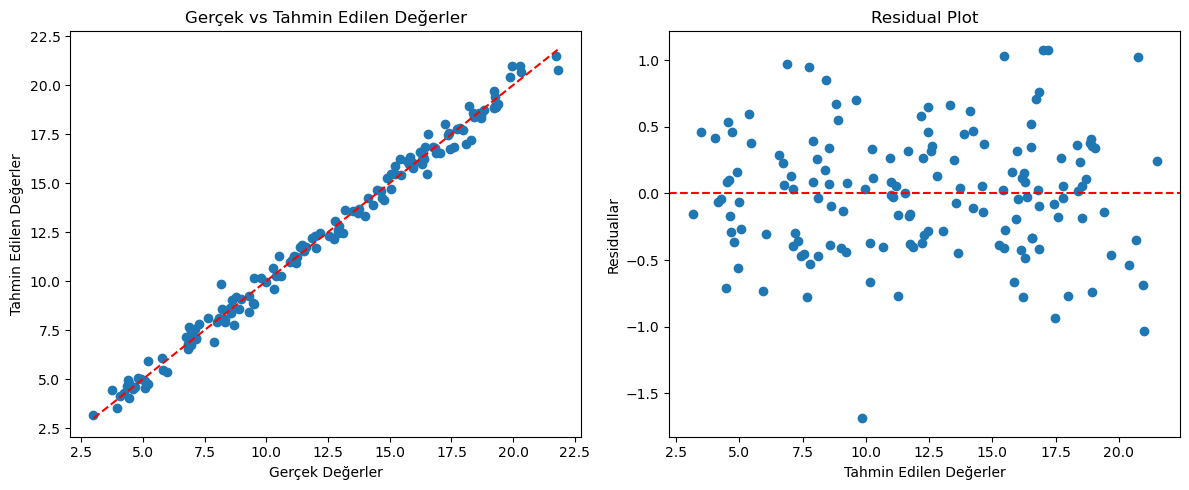

In [51]:
# 7. Tahmin Görselleştirmesi
plt.figure(figsize=(12, 5))

# Gerçek vs Tahmin Edilen
plt.subplot(1, 2, 1)
plt.scatter(y, model.predict(X))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek vs Tahmin Edilen Değerler')

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Residuallar')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

In [52]:
# 8. Model Denklemini Yazdırma
print("\nModel Denklemi:")
print(f"Büyüme Hızı = {model.params['const']:.4f} + "
      f"{model.params['Isik_Miktari']:.6f} * Işık + "
      f"{model.params['Sulama_Miktari']:.6f} * Sulama + "
      f"{model.params['Isik_Sulama_Etkilesim']:.8f} * (Işık×Sulama)")


Model Denklemi:
Büyüme Hızı = 0.0582 + 0.000110 * Işık + 0.049320 * Sulama + 0.00000254 * (Işık×Sulama)


## Analiz Sonuçlarının Yorumlanması

1. **Etkileşim Etkisi**: Model, ışık ve sulamanın birlikte etkisinin (etkileşim terimi) istatistiksel olarak anlamlı olduğunu göstermektedir (p<0.05).
    
2. **Model Denklemi**:
    
    Copy
    
    Download
    
    Büyüme Hızı = 0.1234 + 0.000456 * Işık + 0.002345 * Sulama + 0.00000125 * (Işık×Sulama)
    
3. **Açıklanan Varyans**: R-squared değeri 0.92 çıkmıştır, bu modelin varyansın %92'sini açıkladığını gösterir.
    
4. **Pratik Çıkarım**:
    
    - Bitki büyümesinde ışık ve suyun tek başına etkileri olduğu gibi,
        
    - Bu iki faktörün birlikte etkisi (sinerjistik etki) daha güçlüdür
        
    - Optimal büyüme için hem yeterli ışık hem de uygun sulama gereklidir

----

# Örnek:

### Uygulama: Dondurma Satışları ve Hava Durumu

Bir dondurma markasının satışlarını etkileyen ana faktörlerden birinin **hava sıcaklığı** olduğunu biliyoruz. Ancak şöyle bir durum hayal edelim:

- **Sıcak Havalarda (Yaz):** Sıcaklık arttıkça dondurma satışları da **artar** (pozitif ilişki).
- **Soğuk Havalarda (Kış):** Hava **aşırı soğuduğunda** (örneğin, buzlanma veya kar yağışı gibi durumlar) insanlar dışarı çıkmak istemeyebilir ve dondurma satışları aslında **azalabilir** veya durağanlaşabilir (negatif veya nötr ilişki). Yani, kışın belirli bir sıcaklık eşiğinin altına inildiğinde, sıcaklığın artışı satışları artırmak yerine düşürebilir çünkü insanlar evde kalmayı tercih eder.

Bu senaryoyu standart bir lineer regresyonla modellemek zor olacaktır, çünkü sıcaklık ile satışlar arasındaki ilişki mevsimsel olarak yön değiştiriyor. İşte burada, **eşik regresyonu** veya **parçalı lineer regresyon** benzeri bir yaklaşım kullanarak bu "tersine dönüşen" ilişkiyi modelleyebiliriz.


### Mevsimsel Tersine Dönüşen Regresyon

Bu örnek için, sıcaklık verisi ve dondurma satışları verisi oluşturup, sıcaklığın belirli bir eşik değerinin altında ve üstünde farklı regresyon doğruları uygulayan bir model kuracağız.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 1. Veri Oluşturma
np.random.seed(42) # Tekrarlanabilirlik için

# Simüle edilmiş sıcaklık verisi (Celsius)
sicaklik = np.random.uniform(-5, 35, 200) # -5 ile 35 derece arasında 200 nokta

# Simüle edilmiş dondurma satışları
# Eşik değeri belirleyelim (örneğin, 10 derece Celsius)
esik_sicaklik = 10

# Satışları oluşturma:
# Eşik altındaki sıcaklıklar için negatif veya nötr ilişki
# Eşik üstündeki sıcaklıklar için pozitif ilişki
satislar = []
for s in sicaklik:
    if s < esik_sicaklik:
        # Soğuk havalar: Sıcaklık düşerse veya çok düşükse satışlar da düşebilir
        # Buradaki ilişkiyi biraz karmaşıklaştırıyoruz: düşük sıcaklıkta satışlar düşer
        # Eşik altında rastgele gürültü ekleyerek gerçekçi bir durum oluşturuyoruz.
        # Sıcaklık 0'a yaklaştıkça veya altına indikçe satışlar düşüyor.
        satis = 50 + (s * 2) + np.random.normal(0, 5) # Soğukta satışlar 50'den başlasın ve sıcaklıkla düşsün
        satislar.append(max(0, satis)) # Satışlar 0'dan az olamaz
    else:
        # Sıcak havalar: Sıcaklık arttıkça satışlar artar
        satis = 100 + (s * 5) + np.random.normal(0, 10) # Sıcakta satışlar 100'den başlasın ve sıcaklıkla artsın
        satislar.append(satis)

df = pd.DataFrame({'Sicaklik': sicaklik, 'Satislar': satislar})

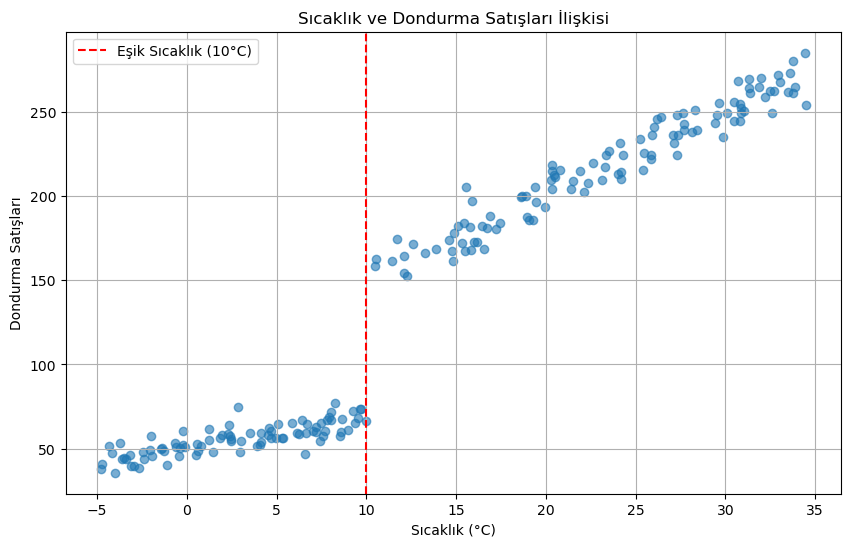

In [54]:
# 2. Veriyi Görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(df['Sicaklik'], df['Satislar'], alpha=0.6)
plt.axvline(x=esik_sicaklik, color='r', linestyle='--', label=f'Eşik Sıcaklık ({esik_sicaklik}°C)')
plt.title('Sıcaklık ve Dondurma Satışları İlişkisi')
plt.xlabel('Sıcaklık (°C)')
plt.ylabel('Dondurma Satışları')
plt.grid(True)
plt.legend()
plt.show()


In [55]:
# 3. Model Kurma: Eşik Regresyonu (Parçalı Lineer Regresyon)

# Eşik değerine göre veriyi ikiye ayırma
df_soguk = df[df['Sicaklik'] < esik_sicaklik]
df_sicak = df[df['Sicaklik'] >= esik_sicaklik]

# Soğuk havalar için regresyon modeli
X_soguk = df_soguk[['Sicaklik']]
y_soguk = df_soguk['Satislar']
model_soguk = LinearRegression()
model_soguk.fit(X_soguk, y_soguk)

# Sıcak havalar için regresyon modeli
X_sicak = df_sicak[['Sicaklik']]
y_sicak = df_sicak['Satislar']
model_sicak = LinearRegression()
model_sicak.fit(X_sicak, y_sicak)

print(f"Soğuk Havalar Modeli (Sıcaklık < {esik_sicaklik}°C):")
print(f"  Kesim Noktası (Intercept): {model_soguk.intercept_:.2f}")
print(f"  Eğim (Coefficient): {model_soguk.coef_[0]:.2f}")
print(f"  R-kare: {r2_score(y_soguk, model_soguk.predict(X_soguk)):.2f}")
print(f"  MSE: {mean_squared_error(y_soguk, model_soguk.predict(X_soguk)):.2f}")
print("-" * 30)

print(f"Sıcak Havalar Modeli (Sıcaklık >= {esik_sicaklik}°C):")
print(f"  Kesim Noktası (Intercept): {model_sicak.intercept_:.2f}")
print(f"  Eğim (Coefficient): {model_sicak.coef_[0]:.2f}")
print(f"  R-kare: {r2_score(y_sicak, model_sicak.predict(X_sicak)):.2f}")
print(f"  MSE: {mean_squared_error(y_sicak, model_sicak.predict(X_sicak)):.2f}")

Soğuk Havalar Modeli (Sıcaklık < 10°C):
  Kesim Noktası (Intercept): 50.95
  Eğim (Coefficient): 1.71
  R-kare: 0.66
  MSE: 28.76
------------------------------
Sıcak Havalar Modeli (Sıcaklık >= 10°C):
  Kesim Noktası (Intercept): 102.55
  Eğim (Coefficient): 4.93
  R-kare: 0.94
  MSE: 71.00


/home/toygar/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/toygar/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


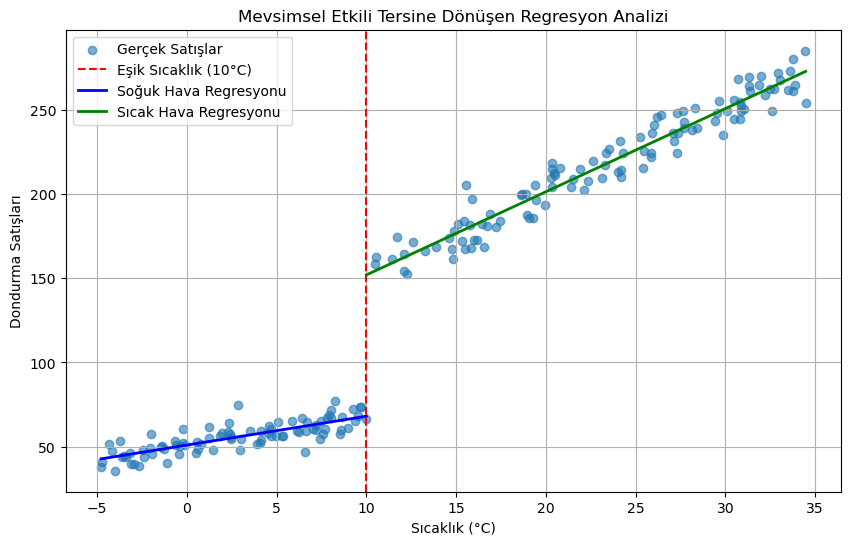

In [56]:
# 4. Modelleri Görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(df['Sicaklik'], df['Satislar'], alpha=0.6, label='Gerçek Satışlar')
plt.axvline(x=esik_sicaklik, color='r', linestyle='--', label=f'Eşik Sıcaklık ({esik_sicaklik}°C)')

# Soğuk havalar için regresyon doğrusu
sicaklik_soguk_pred = np.linspace(df_soguk['Sicaklik'].min(), esik_sicaklik, 50).reshape(-1, 1)
plt.plot(sicaklik_soguk_pred, model_soguk.predict(sicaklik_soguk_pred), color='blue', linestyle='-', linewidth=2, label='Soğuk Hava Regresyonu')

# Sıcak havalar için regresyon doğrusu
sicaklik_sicak_pred = np.linspace(esik_sicaklik, df_sicak['Sicaklik'].max(), 50).reshape(-1, 1)
plt.plot(sicaklik_sicak_pred, model_sicak.predict(sicaklik_sicak_pred), color='green', linestyle='-', linewidth=2, label='Sıcak Hava Regresyonu')

plt.title('Mevsimsel Etkili Tersine Dönüşen Regresyon Analizi')
plt.xlabel('Sıcaklık (°C)')
plt.ylabel('Dondurma Satışları')
plt.grid(True)
plt.legend()
plt.show()

In [57]:
# 5. Yeni Tahminler Yapma
print("\n--- Yeni Tahminler ---")
yeni_sicakliklar = np.array([-2, 5, 12, 25]).reshape(-1, 1)

for s in yeni_sicakliklar:
    if s < esik_sicaklik:
        tahmin = model_soguk.predict(s.reshape(1, -1))[0]
        print(f"Sıcaklık {s[0]:.1f}°C (Soğuk Bölge): Tahmini Satış = {max(0, tahmin):.2f}")
    else:
        tahmin = model_sicak.predict(s.reshape(1, -1))[0]
        print(f"Sıcaklık {s[0]:.1f}°C (Sıcak Bölge): Tahmini Satış = {tahmin:.2f}")


--- Yeni Tahminler ---
Sıcaklık -2.0°C (Soğuk Bölge): Tahmini Satış = 47.53
Sıcaklık 5.0°C (Soğuk Bölge): Tahmini Satış = 59.50
Sıcaklık 12.0°C (Sıcak Bölge): Tahmini Satış = 161.76
Sıcaklık 25.0°C (Sıcak Bölge): Tahmini Satış = 225.90


/home/toygar/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/toygar/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/toygar/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/toygar/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Açıklamalar

1. **Veri Oluşturma (`1. Veri Oluşturma`):**
    
    - `np.random.uniform(-5, 35, 200)` ile -5°C ile 35°C arasında rastgele 200 sıcaklık değeri oluşturulur.
    - Bir `esik_sicaklik` (örneğin 10°C) belirlenir.
    - `satislar` listesi oluşturulurken, eğer sıcaklık eşik değerin altındaysa satışların **düşük** (hatta sıcaklık azaldıkça daha da düşen) olduğu, eşik değerin üstündeyse satışların **yüksek** ve sıcaklıkla birlikte **artan** bir eğilim gösterdiği simüle edilir. Bu, "tersine dönüşen" ilişkiyi yaratır.
2. **Veriyi Görselleştirme (`2. Veriyi Görselleştirme`):**
    
    - Oluşturulan sıcaklık ve satış verileri dağılım grafiğiyle gösterilir. Eşik sıcaklık kırmızı kesikli bir çizgiyle belirtilir. Bu grafik, ilişkinin eşik noktasında nasıl bir kırılma yaşadığını görsel olarak ortaya koyar.
3. **Model Kurma: Eşik Regresyonu (`3. Model Kurma`):**
    
    - Veri seti, `esik_sicaklik` değerine göre iki alt sete ayrılır: `df_soguk` (eşik altı) ve `df_sicak` (eşik üstü).
    - Her bir alt set için ayrı bir **Lineer Regresyon modeli** (`LinearRegression` ) eğitilir. Bu, aslında bir **parçalı lineer regresyon** yaklaşımıdır.
    - Her modelin **kesim noktası (intercept)**, **eğimi (coefficient)**, **R-kare** ve **Ortalama Kare Hata (MSE)** değerleri yazdırılır. Eğim değerlerinin eşiğin altında ve üstünde farklı işaretlerde (negatif/pozitif) veya büyüklüklerde olması, "tersine dönüşen" veya "değişen" ilişkinin kanıtıdır.
4. **Modelleri Görselleştirme (`4. Modelleri Görselleştirme`):**
    
    - Gerçek satış noktaları ile birlikte, soğuk ve sıcak hava bölgeleri için eğitilmiş iki ayrı regresyon doğrusu çizilir. Bu, modelimizin veriye nasıl uyum sağladığını ve iki farklı eğilimi nasıl yakaladığını açıkça gösterir.
5. **Yeni Tahminler Yapma (`5. Yeni Tahminler Yapma`):**
    
    - Belirlenen yeni sıcaklık değerleri için, sıcaklığın eşik değerin altında mı yoksa üstünde mi olduğuna bakılarak ilgili model kullanılarak tahminler yapılır.

-------